In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

# Save the DataFrame as a CSV file
data = pd.read_csv('/content/2021.csv')


In [ ]:
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,b'01192021',b'01',b'19',b'2021',1100.0,b'2021000001',2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000002',2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,b'01212021',b'01',b'21',b'2021',1100.0,b'2021000003',2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,b'01172021',b'01',b'17',b'2021',1100.0,b'2021000004',2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,b'01152021',b'01',b'15',b'2021',1100.0,b'2021000005',2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [ ]:
data.describe()

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
count,438693.000000,438693.000000,438693.000000,4.386930e+05,117786.000000,117786.000000,30.0,117786.0,117786.0,117786.000000,...,4.386930e+05,4.386930e+05,3.876060e+05,3.785660e+05,438693.000000,438693.000000,4.386930e+05,4.386930e+05,4.386930e+05,4.386930e+05
mean,30.742155,6.405680,1118.189030,2.021006e+09,1.000017,1.000255,1.0,1.0,2.0,1.006291,...,8.835473e-01,8.629406e-01,1.783430e+02,2.715442e+02,2.270561,2.257184,9.949669e-01,9.926988e-01,1.265190e-01,1.516619e-01
std,15.334888,3.421731,38.575453,6.383751e+03,0.004121,0.015957,0.0,0.0,0.0,0.079067,...,3.207674e-01,3.439104e-01,6.912931e+02,1.036227e+03,2.485479,2.711460,7.076589e-02,8.513485e-02,3.472441e-01,3.785014e-01
min,1.000000,1.000000,1100.000000,2.021000e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000,1.000000,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
25%,20.000000,3.000000,1100.000000,2.021002e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,5.700000e+01,1.140000e+02,1.000000,1.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
50%,31.000000,6.000000,1100.000000,2.021004e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,1.000000e+02,1.670000e+02,1.000000,1.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
75%,41.000000,9.000000,1100.000000,2.021008e+09,1.000000,1.000000,1.0,1.0,2.0,1.000000,...,1.000000e+00,1.000000e+00,2.000000e+02,2.290000e+02,2.000000,2.000000,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
max,78.000000,12.000000,1200.000000,2.021039e+09,2.000000,2.000000,1.0,1.0,2.0,2.000000,...,1.000000e+00,1.000000e+00,1.980000e+04,3.960000e+04,9.000000,9.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00


In [ ]:
data.shape

(438693, 303)

In [ ]:
sum_of_null_values = data.isna().sum()
print(sum_of_null_values)

_STATE      0
FMONTH      0
IDATE       0
IMONTH      0
IDAY        0
           ..
_VEGLT1A    0
_FRT16A     0
_VEG23A     0
_FRUITE1    0
_VEGETE1    0
Length: 303, dtype: int64


In [ ]:
# Iterate over all columns in the DataFrame
for col in data.columns:
    # Count the number of null values in the column
    null_count = data[col].isnull().sum()

    # Calculate the total number of rows in the column
    total_count = len(data[col])

    # Calculate the percentage of null values
    null_percentage = (null_count / total_count) * 100

    # Check if the percentage of null values is greater than or equal to 90%
    if null_percentage > 90:
        # Drop the column if the percentage of null values is greater than or equal to 90%
        data.drop(col, axis=1, inplace=True)


In [ ]:
#The shape of data after dropping the columns with more than 90% of its data is null.
data.shape

(438693, 212)

In [ ]:
#CHCOCNCR and CHCSCNCR correspond to the presence or absence of cancer. For our analysis, we only need rows where cancer status is known and either positive or negative.
#Positive corresponds to a value of 1, and Negative corresponds to a value of 2.
# For our Analysis we dont require the rows having these values 7 - Don't Know & 9 - Refused

# Filter the rows where either 'CHCSCNCR' or 'CHCOCNCR' column has values 1 or 2
data = data.loc[(data['CHCSCNCR'].isin([1, 2]) | data['CHCOCNCR'].isin([1, 2]))]

# store the count of label for cancer disease
skin_cancer_count = np.where(data['CHCSCNCR']==1, 1, 0) #for skin cancer
other_cancer_count = np.where(data['CHCOCNCR']==1, 1, 0) # for other cancer
skin_other_count = np.where((data['CHCSCNCR']==1) | (data['CHCOCNCR']==1), 1, 0)


In [ ]:
# drop the cancer label coulmn
data = data.drop(['CHCSCNCR'], axis=1)
data = data.drop(['CHCOCNCR'], axis=1)
print("shape of data")
data.shape


shape of data


(438291, 210)

In [ ]:
#Based on our observation from the code book, there are certain columns that are not relevant to health, and therefore it would be advisable to eliminate them.

# removing columns FMONTH, DISPCODE, SEQNO, PVTRESD1, HHADULT
data = data.drop(columns = ['FMONTH','DISPCODE','SEQNO','PVTRESD1','HHADULT', 'STATERE1', 'CELPHON1'], axis=1)

# removing date columns IMONTH, IDAY, IDATE, and IYEAR as they are the columns of interview date
data = data.drop(columns = ['IMONTH', 'IDAY', 'IDATE', 'IYEAR'], axis=1)

print("shape of data after removing the columns which are not need for our analysis")
data.shape

shape of data after removing the columns which are not need for our analysis


(438291, 199)

In [ ]:
# We are Replacing the NaN or Null values with the median of each columns and creating a new dataframe with filled in values.

cancer_df = data.fillna(data.median())

## We use the Heatmaps to find out the coorelation between columns.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix using Pandas corr() function
corr_matrix = cancer_df.corr().abs()

corr_matrix

,_STATE,_PSU,CTELENM1,LADULT1,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
_STATE,1.000000,0.046555,0.001078,0.052158,0.002084,0.007917,0.010886,0.009686,0.009649,NaN,...,0.004736,0.005854,0.001418,0.004332,0.004981,0.004191,0.002045,0.002270,0.005208,0.006339
_PSU,0.046555,1.000000,0.001632,0.033594,0.101536,0.106525,0.041926,0.065259,0.151604,NaN,...,0.028972,0.029333,0.041220,0.051861,0.030175,0.029469,0.045656,0.055641,0.045385,0.051695
CTELENM1,0.001078,0.001632,1.000000,0.000088,0.002128,0.005283,0.000163,0.000243,0.000558,NaN,...,0.000774,0.000850,0.000196,0.000119,0.000661,0.000989,0.000152,0.000183,0.000777,0.000855
LADULT1,0.052158,0.033594,0.000088,1.000000,0.016770,0.002614,0.006788,0.019986,0.000899,NaN,...,0.000685,0.000049,0.001684,0.003174,0.000573,0.000196,0.002927,0.003529,0.000561,0.001633
NUMADULT,0.002084,0.101536,0.002128,0.016770,1.000000,0.401737,0.436977,0.451937,0.181858,NaN,...,0.000459,0.011948,0.006895,0.004434,0.003819,0.014856,0.002909,0.000814,0.001611,0.010487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_VEGLT1A,0.004191,0.029469,0.000989,0.000196,0.014856,0.014157,0.000402,0.001771,0.006747,NaN,...,0.728413,0.991044,0.028169,0.049867,0.720994,1.000000,0.014025,0.039712,0.667010,0.882422
_FRT16A,0.002045,0.045656,0.000152,0.002927,0.002909,0.001722,0.001059,0.001003,0.000372,NaN,...,0.025780,0.011880,0.830494,0.368483,0.036330,0.014025,1.000000,0.398050,0.384194,0.168399
_VEG23A,0.002270,0.055641,0.000183,0.003529,0.000814,0.001938,0.000060,0.004032,0.000559,NaN,...,0.021542,0.034122,0.375026,0.827891,0.025886,0.039712,0.398050,1.000000,0.142510,0.419175
_FRUITE1,0.005208,0.045385,0.000777,0.000561,0.001611,0.001593,0.002999,0.001001,0.003337,NaN,...,0.913041,0.672463,0.303213,0.127255,0.892942,0.667010,0.384194,0.142510,1.000000,0.675043


**Highly correlated columns in a dataset indicate that they are measuring similar or almost identical aspects of the data. This can cause issues in statistical analysis, such as multicollinearity, which can affect the accuracy of model predictions. Therefore, removing highly correlated columns can help to simplify the data, reduce noise and redundancy,and improve the accuracy and interpretability of the analysis results.**

In [ ]:
# Initialize empty list for highly correlated columns
high_corr_cols = []

# Iterate over the upper triangle of the correlation matrix
for i in range(1, corr_matrix.shape[0]-1):
    for j in range(0,i):
        # Check if correlation coefficient is greater than 0.85
        if corr_matrix.iloc[i][j] > 0.85:
            # Add column name to list of highly correlated columns
            high_corr_cols.append(corr_matrix.columns[j])

# Print list of highly correlated columns
print("Highly correlated columns:", high_corr_cols)


Highly correlated columns: ['ACETOUCH', 'ACETTHEM', '_STATE', '_STRWT', '_CRACE1', '_STRWT', '_WT2RAKE', 'EXERANY2', 'LMTJOIN3', '_PRACE1', '_RACE', '_RACEG21', '_IMPRACE', '_RACE', 'SEXVAR', '_HCVU652', '_AGEG5YR', '_AGEG5YR', '_AGE80', 'HTIN4', 'WTKG3', 'EDUCA', '_RFSMOK3', 'DRNKANY5', 'DRNKANY5', 'DROCDY3_', 'DRNKANY5', 'DROCDY3_', '_RFBING5', 'DRNKANY5', 'DROCDY3_', '_RFBING5', '_DRNKWK1', 'HIVTST7', '_MISFRT1', '_MISFRT1', '_MISVEG1', 'FRUTDA2_', 'VEGEDA2_', '_MISFRT1', '_FRTRES1', '_MISVEG1', '_VEGRES1', '_MISFRT1', '_FRTRES1', '_FRTLT1A']


In [ ]:
cancer_df = cancer_df.drop(high_corr_cols,axis = 1)


In [ ]:
print("shape of data after removing the columns with high coorelation")
cancer_df.shape

shape of data after removing the columns with high coorelation


(438291, 167)

In [ ]:
# Now we are inserting the labels columns back to the dataframe
cancer_df.insert(len(cancer_df.columns), 'Cancerlabels', skin_other_count)

<ipython-input-17-11c2e7bdc0e6>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancer_df.insert(len(cancer_df.columns), 'Cancerlabels', skin_other_count)


In [ ]:
cancer_df.shape

(438291, 168)

## DATA VISUALIZATION

## Relationship between health condition and cancer
The data provided has the chronic health condition criteria which will help us to know how chronic health condition is related to cancer
Field name for chronic health condition - HAVARTH5


In [ ]:
# For data visualization we copy the data frame into a new data frame

data_visualization_cancer = cancer_df.copy()

By replacing the values 2, 7 and 9 with 0 and NaN, we are essentially cleaning and preparing the data for further analysis.

Replacing 2 with 0 can be useful for the binary representation of the data where 0 represents 'No' and 1 represents 'Yes'.

Replacing 7 and 9 with NaN is to handle missing values in the data. It helps in avoiding any bias in the analysis that might be introduced due to missing data.

In [ ]:
# Converting the values

#data_visualization_cancer['HAVARTH5'].replace(2, 0, inplace=True)
#data_visualization_cancer['HAVARTH5'].replace(7, np.nan, inplace=True)
#data_visualization_cancer['HAVARTH5'].replace(9, np.nan, inplace=True)

# Replace all occurrences of 2 in the 'HAVARTH5' column with 0, and all occurrences of 7 and 9 with NaN
data_visualization_cancer['HAVARTH5'].replace({2: 0, 7: np.nan, 9: np.nan}, inplace=True)

<Axes: xlabel='HAVARTH5,Cancerlabels'>

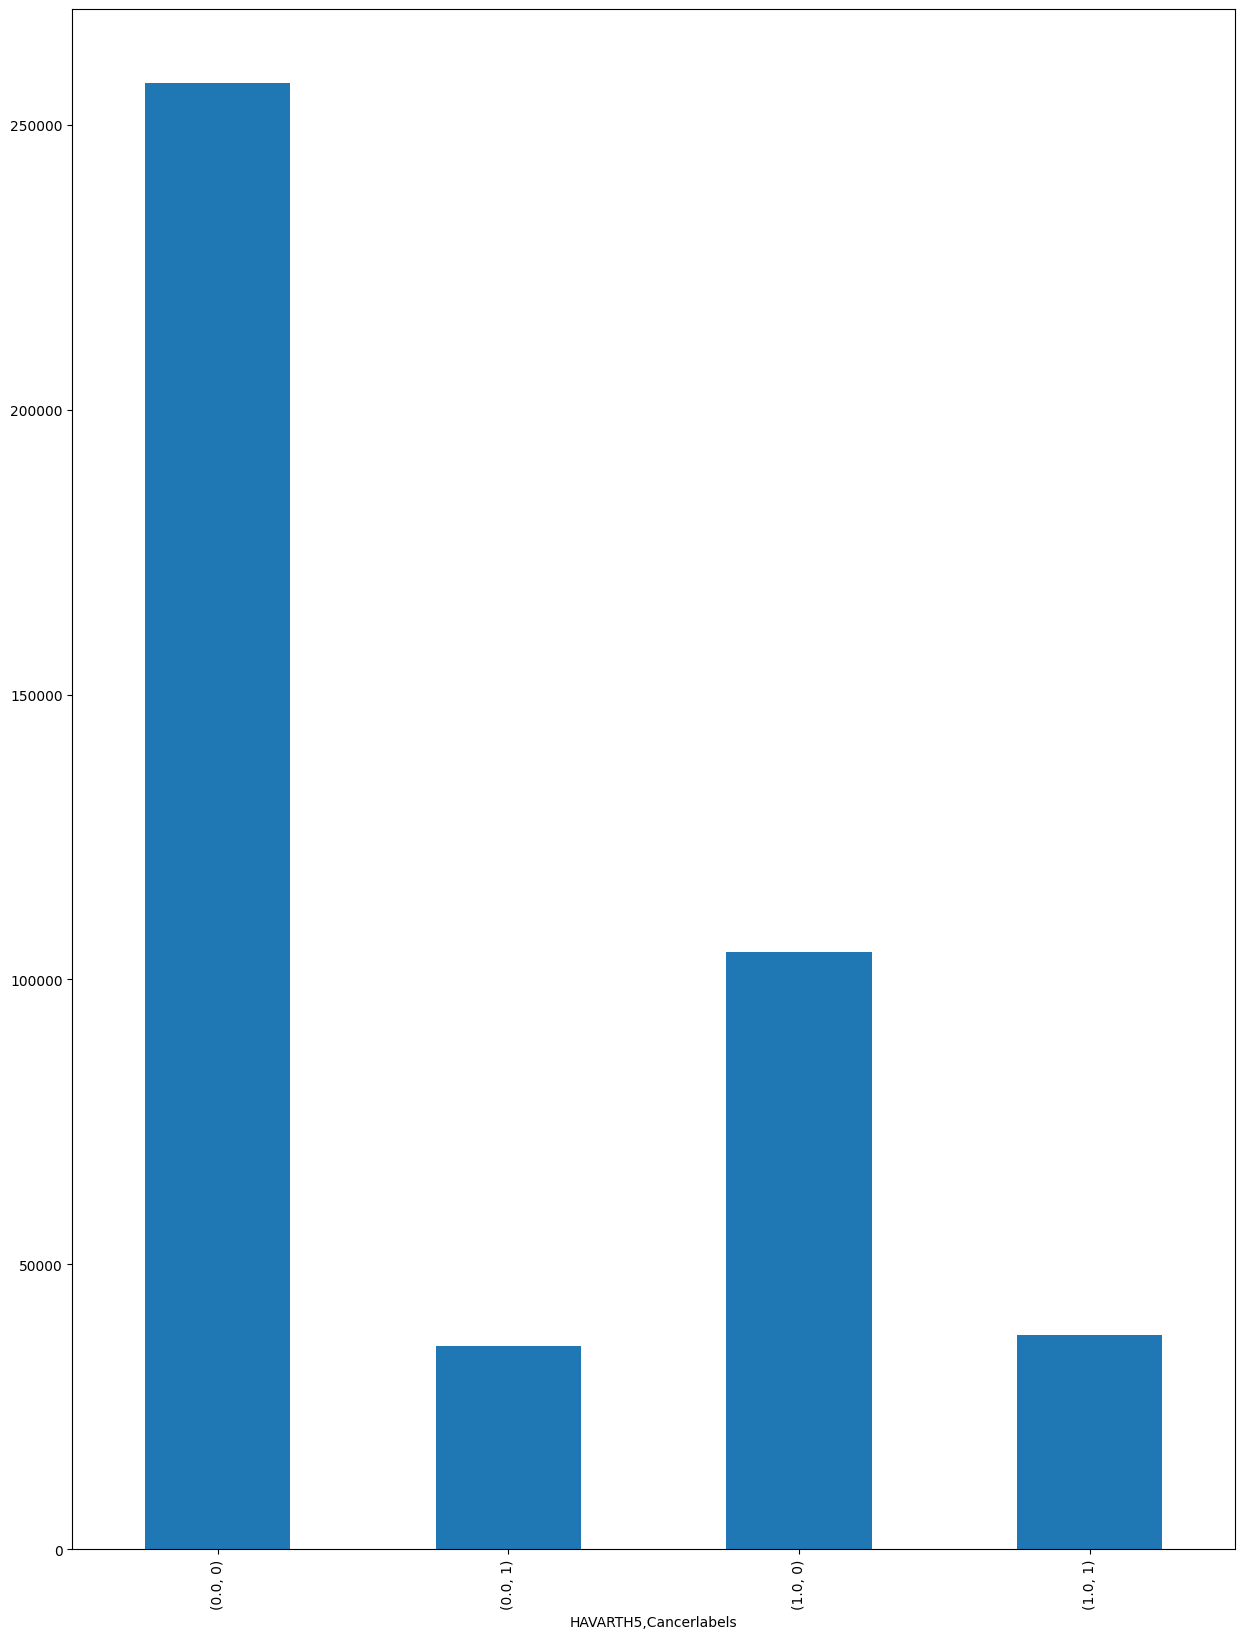

In [ ]:
#plt.figure(figsize=(15,20))
#data_visualization = data_visualization_cancer.groupby(['HAVARTH5','Cancerlabels']).size()


# Create a new figure and axis object with a size of 15x20
fig, ax = plt.subplots(figsize=(15, 20))

# Group the 'finalizedData' DataFrame by 'TOLDHI3' and 'CVDINFR4' columns, count the number of occurrences,
# and plot the result as a bar chart using the 'ax' object

data_visualization = data_visualization_cancer.groupby(['HAVARTH5','Cancerlabels']).size()
data_visualization.plot(kind='bar', ax=ax)

In [ ]:
ploting_data = data_visualization.unstack()
plot_transpose = ploting_data.transpose()
plot_split = plot_transpose.div(plot_transpose.sum())
plot_percent = plot_split.transpose()


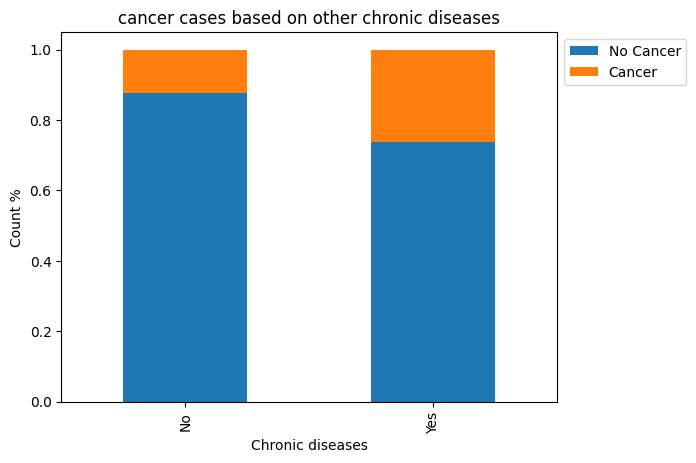

In [ ]:
plot_percent.plot(kind='bar',stacked=True).legend(["No Cancer", "Cancer"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('Chronic diseases')
plt.ylabel('Count %')
plt.title("cancer cases based on other chronic diseases")

plt.show()

# We can plot between the gender and cancer

In [ ]:
data_visualization_gender_cancer = cancer_df.copy()
count_male = len(data_visualization_gender_cancer[data_visualization_gender_cancer['CELLSEX']==1])
count_female = len(data_visualization_gender_cancer[data_visualization_gender_cancer['CELLSEX']==2])

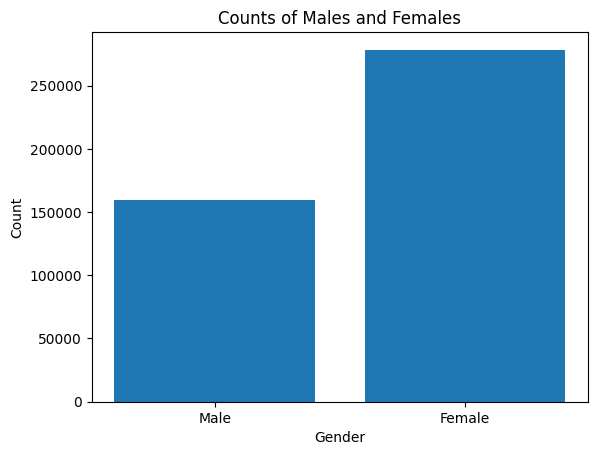

In [ ]:
gender_counts = {'Male': count_male, 'Female': count_female}
plt.bar(gender_counts.keys(), gender_counts.values())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Males and Females')
plt.show()

## CLASSIFICATION

In [ ]:
cancer_df.head()

,_PSU,CTELENM1,LADULT1,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,...,FRNCHDA_,POTADA1_,_FRUTSU1,_VEGESU1,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,Cancerlabels
0,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,4.300000e+01,14.0,100.0,214.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0
1,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,5.397605e-79,14.0,100.0,128.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0
2,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.400000e+01,14.0,100.0,71.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79,0
3,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,5.700000e+01,27.0,114.0,165.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0
4,2.021000e+09,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,2.900000e+01,29.0,100.0,258.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,0


In [ ]:
#We will Seperate the labels from the dataset

cancer_label = cancer_df['Cancerlabels']

#After seperating we will drop the Cancerlabel

cancer_df.drop(['Cancerlabels'], axis=1, inplace=True)

In [ ]:
cancer_positive = (cancer_label == 0).sum()
cancer_negative = (cancer_label == 1).sum()

# Actual count of cancer labels below
print("Cancer positive cases",cancer_positive)
print("Cancer negative cases",cancer_negative)


Cancer positive cases 364506
Cancer negative cases 73785


#Scaling the features using standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(cancer_df)


In [ ]:
#To check whether the data is standardized

print(np.mean(normalized_data, axis=0))
print(np.std(normalized_data, axis=0))


[-1.74361060e-12  8.40694044e-15 -2.33285876e-16  1.94539994e-16
 -1.18020929e-16 -7.09422510e-17 -5.33169276e-16 -4.93872197e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.66779178e-16 -1.24304571e-15  4.35769585e-16  4.39660385e-17
  3.20342523e-17 -1.72492128e-17 -5.44711982e-17  2.15031539e-16
  2.10103193e-17 -4.85053050e-17 -5.12612883e-17  7.06180176e-17
 -6.80889977e-17 -2.25293524e-16  7.63893708e-17 -8.78023837e-17
 -7.81726541e-17 -9.62972968e-18 -6.96453177e-17 -6.07937480e-18
 -1.47720702e-16 -1.58209650e-16  1.16983383e-16 -1.75345381e-16
  7.89183907e-17 -1.92724287e-16  8.79645004e-17 -1.50184875e-16
  1.89611647e-16 -2.41099899e-16  7.62596775e-17 -7.85293107e-17
 -1.04792210e-16  3.39796522e-17 -7.26282642e-17  8.30037306e-18
 -1.53167822e-16  2.68465191e-17 -1.07580616e-16  4.56520518e-17
 -3.18948319e-16  2.20478659e-17 -3.20342523e-17  2.03618527e-17
  1.84942687e-16  1.85461460e-17  1.35918609e-16 -5.10991716e-17
  1.70870961e-16  3.34608

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_data, cancer_label, test_size=0.3, random_state=42)


#LOGISTIC REGRESSION

In [ ]:

parameters = {'max_iter':[100, 150]}

model = LogisticRegression(class_weight="balanced")
LR = GridSearchCV(model, parameters, scoring='recall')
LR.fit(X_train, y_train)

y_true, y_pred = y_test, LR.predict(X_test)
print(classification_report(y_true, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

              precision    recall  f1-score   support

           0       0.94      0.65      0.77    109268
           1       0.31      0.78      0.45     22220

    accuracy                           0.67    131488
   macro avg       0.62      0.72      0.61    131488
weighted avg       0.83      0.67      0.71    131488



#DECISION TREE

In [ ]:
from sklearn import tree

parameters = {'splitter':['best', 'random'], 'max_depth':[5, 10, 15, 20, 25], 'criterion':['gini', 'entropy']}

model = tree.DecisionTreeClassifier(class_weight="balanced")
DT = GridSearchCV(model, parameters, scoring='recall', verbose=2)
DT.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=  10.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   7.8s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   7.4s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   8.5s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   7.2s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   4.3s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   4.2s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   4.7s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   4.6s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   3.9s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=  11.3s
[CV] END ........criterion=gini, max_depth=10, 

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [ ]:
y_true, y_pred = y_test, DT.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72    109268
           1       0.29      0.83      0.43     22220

    accuracy                           0.63    131488
   macro avg       0.62      0.71      0.58    131488
weighted avg       0.83      0.63      0.67    131488



#RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = RandomForestClassifier()
params = {'max_depth':[10, 15], 'n_estimators':[100, 150]}

RF = GridSearchCV(model, params, cv=5,verbose=2)
RF.fit(X_train,y_train.ravel())
RF_best = RF.best_estimator_
y_pred=RF_best.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=10, n_estimators=100; total time=  49.6s
[CV] END .....................max_depth=10, n_estimators=100; total time=  52.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=  51.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  50.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  58.9s
[CV] END .....................max_depth=10, n_estimators=150; total time= 1.3min
[CV] END .....................max_depth=10, n_estimators=150; total time= 1.2min
[CV] END .....................max_depth=10, n_estimators=150; total time= 1.2min
[CV] END .....................max_depth=10, n_estimators=150; total time= 1.3min
[CV] END .....................max_depth=10, n_estimators=150; total time= 1.4min
[CV] END .....................max_depth=15, n_estimators=100; total time= 1.1min
[CV] END .....................max_depth=15, n_est

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    109268
           1       0.60      0.01      0.02     22220

    accuracy                           0.83    131488
   macro avg       0.71      0.50      0.46    131488
weighted avg       0.79      0.83      0.76    131488

